# Module 6 Project

Numerical Method CPSMA 441 Prof: Nicholas Jacobs

Member(s): Hoang Tan Truong Aakriti Khadka Aayush Bhurtel

For future use, we'll also include Gauss Jordan and the set of data that we've picked is student.csv from Prof. Jacobs Github repo

In [1]:
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pa


def addRow(matrx, row, toAdd, multiplier):
    temp = matrx.copy()
    for i in range(len(matrx[row, :])):
        temp[row, i] = temp[row, i] + multiplier*temp[toAdd, i]
    return np.array(temp)

def toLeading1(matrx, row, col):
    temp = matrx.copy()
    temp = np.array(temp, float)
    if (temp[row, col] != 0):
        temp[row, :] = temp[row, :]/temp[row, col]
    return np.array(temp)

def gauss_Jordan(matrix):
  newMatrix = matrix
  for pivot in range(len(matrix)):
    newMatrix = toLeading1(newMatrix,pivot,pivot)
    for column in range(0,pivot):
      newMatrix = addRow(newMatrix,column,pivot,-newMatrix[column,pivot])
    for column in range(pivot+1,len(matrix)):
      newMatrix = addRow(newMatrix,column,pivot,-newMatrix[column,pivot])
  return newMatrix

def function(x):
    return np.log(x+1)




Here is the set data for better visualization 

In [4]:
data = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Applied_Stats_Jupyter_Notebooks/master/student.csv')

In [8]:
data

,Year,Gender,Smoke,Award,HigherSAT,Exercise,TV,Height,Weight,Siblings,BirthOrder,VerbalSAT,MathSAT,SAT,GPA,Pulse,Piercings
0,Senior,M,No,Olympic,Math,10.0,1.0,71.0,180.0,4,4.0,540,670,1210,3.13,54,0.0
1,Sophomore,F,Yes,Academy,Math,4.0,7.0,66.0,120.0,2,2.0,520,630,1150,2.50,66,3.0
2,FirstYear,M,No,Nobel,Math,14.0,5.0,72.0,208.0,2,1.0,550,560,1110,2.55,130,0.0
3,Junior,M,No,Nobel,Math,3.0,1.0,63.0,110.0,1,1.0,490,630,1120,3.10,78,0.0
4,Sophomore,F,No,Nobel,Verbal,3.0,3.0,65.0,150.0,1,1.0,720,450,1170,2.70,40,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Sophomore,F,Yes,Nobel,Verbal,2.0,0.0,83.0,130.0,1,1.0,550,540,1090,3.44,80,3.0
358,Sophomore,M,Yes,Olympic,Math,8.0,10.0,61.0,180.0,2,1.0,600,620,1220,3.00,74,0.0
359,Sophomore,F,Yes,Nobel,Verbal,1.0,1.0,65.0,150.0,2,2.0,540,450,990,3.27,78,2.0
360,FirstYear,M,Yes,Olympic,Verbal,14.0,5.0,77.0,205.0,2,2.0,550,550,1100,2.30,72,0.0


MathSAT and SAT are linear reated since the sum of MathSAT and VerbalSAT is SAT. Here's the graph that has the point of (MathSAT and VerbalSAT) and SAT to see that they are identical.

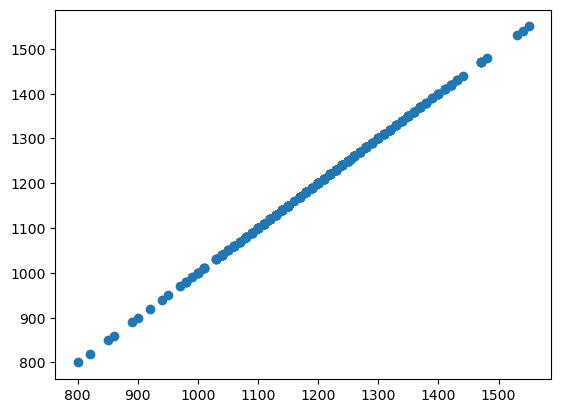

In [9]:
plt.scatter(data['VerbalSAT']+ data['MathSAT'], data['SAT'])
plt.show()

The two rows that we'll focus for now is MathSAT and SAT. Now let's see them in the graph.

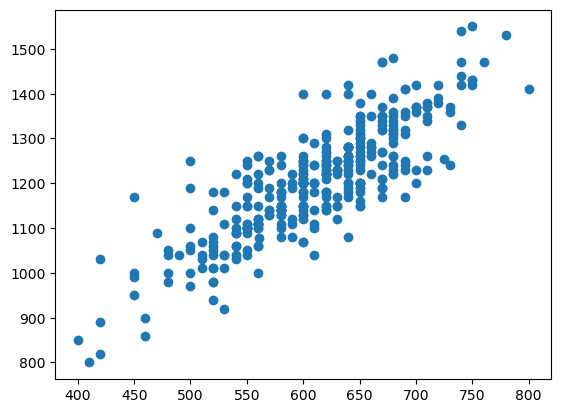

In [11]:
plt.scatter(data['MathSAT'], data['SAT'])
plt.show()

# Linear Regression

We can go ahead and find the regress by using the built in function from the package scipy so that we can compare them later to our regression function.

In [12]:
stats.linregress(data['MathSAT'], data['SAT'])

LinregressResult(slope=1.4814731127631733, intercept=300.7633363387839, rvalue=0.8365916602784129, pvalue=4.093448362145017e-96, stderr=0.05112960119117141, intercept_stderr=31.355860418185074)

Before we get started with the regression function, we will need to make a function that calculates the sum of product of two number from two list. I'll also include a statement that does the same thing that we'll use instead of the function .

In [14]:
def squareAndSum(list1,list2):
  total = 0
  for i in range(len(list1)):
    total = total + list1[i]*list2[i]
  return total

In [15]:
squareAndSum(data['MathSAT'], data['SAT'])

268048133

In [16]:
a = sum(i*j for i, j in zip(data['MathSAT'], data['SAT']))

In [17]:
a

268048133

The following functions will compute the slope and intercept. We will also compare to the result that we have from scipy.

In [28]:
def slopeNintercept(list1, list2):
    n=len(list1)
    xBar = sum(list1)/n
    yBar = sum(list2)/n
    xy = sum(i*j for i,j in zip(list1, list2))
    xx = sum(i*i for i in list1)
    slope = (xy-n*xBar*yBar)/(xx-n*xBar**2)
    intercept = yBar - slope*xBar
    return [slope, intercept]

In [29]:
slope = slopeNintercept(data['MathSAT'], data['SAT'])[0]
print(stats.linregress(data['MathSAT'], data['SAT'])[0])
slope

1.4814731127631733


1.4814731127631662

In [30]:
intercept = slopeNintercept(data['MathSAT'], data['SAT'])[1]
print(stats.linregress(data['MathSAT'], data['SAT'])[1])
intercept

300.7633363387839


300.76333633878824

Very close. Since this is linear, the general form of the function would be f(x)=ax+b.

In [33]:
def f(x):
    return slope*x+intercept

f(5)

308.1707019026041

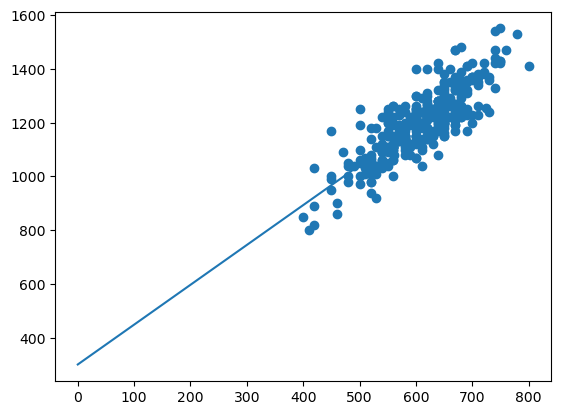

In [34]:
x = np.arange( 0,500,1)
plt.scatter(data["MathSAT"],data["SAT"])
plt.plot(x,f(x))

plt.show()

In [35]:
#Sum of squared residuals
residualsSquareSum = 0
for i in range(0, len(data['SAT'])):
    residualsSquareSum = residualsSquareSum + (f(data['SAT'][i]) - data['MathSAT'][i])**2
    
residualsSquareSum

792923338.5595489

# Non-linear Regression

Since the year is represented at classificaion, I'll translate into number. Another row that we'll use is still SAT. Let's make an intial assumption that their funtion is quadtric.

In [36]:
year = []

for i in range(len(data['Year'])):
    if (data['Year'][i] == "Freshman" or data['Year'][i] == "FirstYear"):
        year.append(1)
    elif (data['Year'][i] == "Sophomore"):
        year.append(2)
    elif (data['Year'][i] == "Junior"):
        year.append(3)
    elif (data['Year'][i] == "Senior"):
        year.append(4)
    else:
        year.append(0)

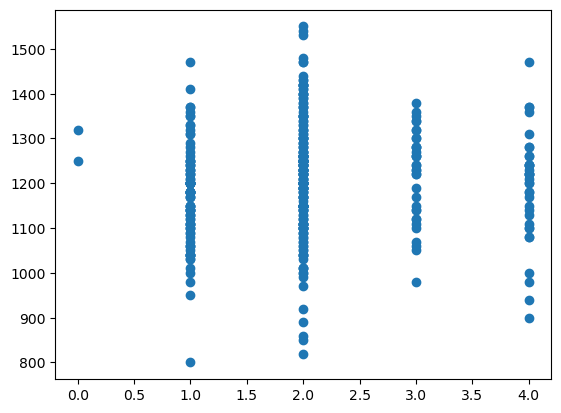

In [40]:
plt.scatter(year, data['SAT'])
plt.show()

In [45]:
single = sum(year)
double = sum(i**2 for i in year)
triple = sum(i**3 for i in year)
quad = sum(i**4 for i in year)

matrix = [[len(data['SAT']), single, double, sum(year)],
          [single, double, triple, sum(i*j for i, j in zip(year, data['SAT']))],
          [double, triple, quad, sum(i*i*j for i,j in zip(year, data['SAT']))]]

In [46]:
matrix

[[362, 733, 1765, 733],
 [733, 1765, 4903, 884476],
 [1765, 4903, 15265, 2129782]]